In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [152]:
DATA_FILE = "final.csv"
names = ["Episode", "Dealer", "Current Hand", "Num Hands", "Hand", "Has Ace", "Can Split", "Has Hit", "Bet Size", "Insurance", "Action", "Reward", "Episode Net Reward"]

raw_df = pd.read_csv(DATA_FILE)

In [153]:
raw_df.head()

,Episode,Dealer,Current Hand,Num Hands,Hand,Has Ace,Can Split,Has Hit,Bet Size,Insurance,Action,Reward,Episode Net Reward
0,12099500000,10,0,1,13,0,0,0,1,0.0,HIT,0.0,NaN
1,12099500000,10,0,1,18,0,0,1,1,0.0,STAND,-1.0,-1.0
2,12099500001,10,0,1,13,0,0,0,1,0.0,HIT,0.0,NaN
3,12099500001,10,0,1,19,0,0,1,1,0.0,STAND,0.0,0.0
4,12099500002,7,0,1,20,0,1,0,1,0.0,STAND,1.0,1.0


In [154]:
raw_df.shape

(888230, 13)

In [155]:
raw_df['Action'].unique()

array(['HIT', 'STAND', 'INSURANCE_HALF', 'SPLIT', 'INSURANCE_FULL',
       'DOUBLE_DOWN'], dtype=object)

In [156]:
def plot_rolling_rewards(df, window, title):
  plot_df = df[["Episode Net Reward"]].dropna().reset_index().rolling(window, step = window).mean()
  plt.plot(plot_df["Episode Net Reward"])
  plt.xlabel("Game")
  plt.ylabel("Profit")
  plt.title(title)

In [157]:
def plot_proportion_hands(df, hands_df, title):
  plot_df = df / hands_df
  plot_df.dropna().plot(kind='bar')
  plt.xlabel("Hand")
  plt.ylabel("Proportion of hands")
  plt.title(title)

## Comparing Alphas

In [158]:
a1_df = pd.read_csv("alpha_1.csv")
a01_df = pd.read_csv("alpha_01.csv")
a001_df = pd.read_csv("alpha_001.csv")

Text(0.5, 1.0, 'Average Reward over Time for different values of alpha')

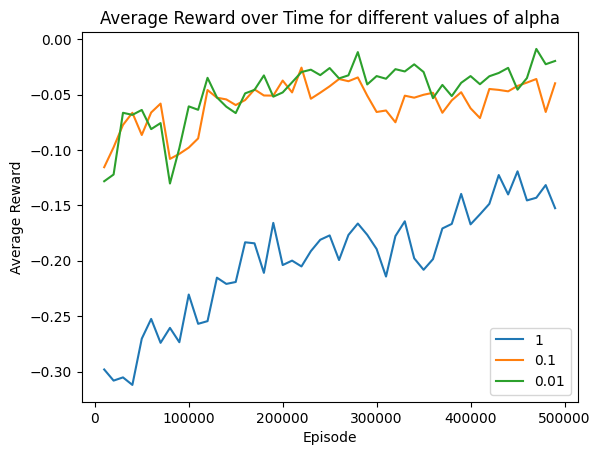

In [159]:
for alpha, df in [(1, a1_df), (0.1, a01_df), (0.01, a001_df)]:
  plot_df = df[["Episode Net Reward"]].dropna().reset_index().rolling(10000, step = 10000).mean()
  plt.plot(plot_df["Episode Net Reward"], label = str(alpha))
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.legend()
plt.title("Average Reward over Time for different values of alpha")

## Monster Run Rewards

In [160]:
monster_rewards_df = pd.read_csv("monster_run_rewards.csv")

In [161]:
monster_rewards_df.head()

,episode,reward
0,100000000,-0.029352
1,200000000,-0.026961
2,300000000,-0.024365
3,400000000,-0.023044
4,500000000,-0.022112


In [162]:
monster_rewards_df.columns

Index(['episode', ' reward'], dtype='object')

Text(0.5, 1.0, 'Average Profit over time, alpha = 0.1')

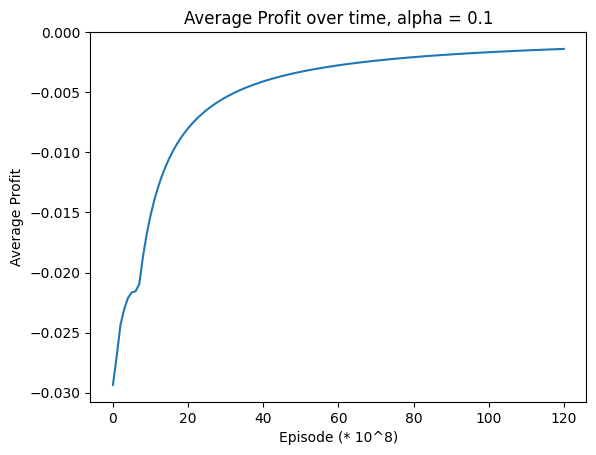

In [163]:
plt.plot(monster_rewards_df[" reward"])
plt.xlabel("Episode (* 10^8)")
plt.ylabel("Average Profit")
plt.title("Average Profit over time, alpha = 0.1")

## Training results

In [164]:
raw_df[["Episode Net Reward"]].dropna().mean()

Episode Net Reward   -0.023849
dtype: float64

In [165]:
raw_df[["Episode Net Reward"]].dropna().tail(10000).mean()

Episode Net Reward   -0.0142
dtype: float64

In [166]:
raw_df["Episode Net Reward"].dropna().tail(10000).std()

1.0061931238386825

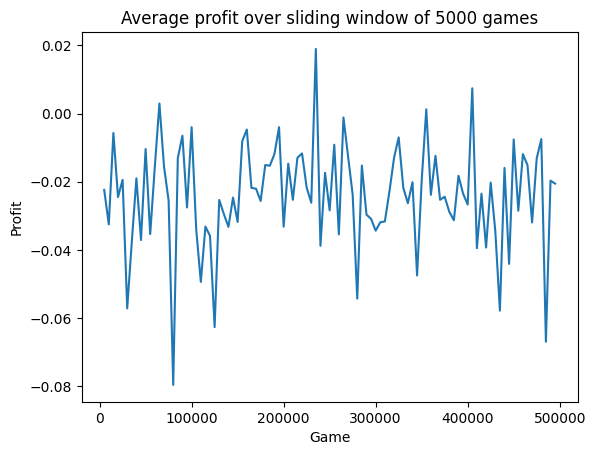

In [167]:
plot_rolling_rewards(raw_df, 5000, "Average profit over sliding window of 5000 games")

## Decisions investigation

In [168]:
# Create new columns for the max hand including ace
raw_df['Max Hand'] = np.where(raw_df['Hand'] + raw_df['Has Ace'] * 10 <= 21, raw_df['Hand'] + raw_df['Has Ace'] * 10, raw_df['Hand'])

In [169]:
# Create new dataframe for proportion of each hand
hands_df = raw_df['Hand'].value_counts()
max_hands_df = raw_df['Max Hand'].value_counts()

### Hit

In [170]:
hit_df = raw_df[raw_df["Action"] == "HIT"]

In [171]:
hit_df['Hand'].mean()

11.5925441568059

In [172]:
hit_df['Max Hand'].value_counts()

13    68485
12    58241
14    56595
15    50959
16    46495
11    30574
10    24676
17    23151
9     20767
8     15881
7     13010
18    10872
19     8716
6      7447
5      6517
20     1447
4       417
21       19
Name: Max Hand, dtype: int64

In [173]:
hit_df['Max Hand'].mean()

12.922504158516574

In [174]:
hit_df['Dealer'].mean()

7.028347690250726

In [175]:
smaller_hand_df = raw_df[raw_df['Hand'] <= raw_df['Dealer']]

In [176]:
smaller_hand_df[smaller_hand_df['Action'] == "HIT"].shape[0] / smaller_hand_df.shape[0]

0.8903986030967772

In [177]:
larger_hand_df = raw_df[raw_df['Max Hand'] > raw_df['Dealer']]

In [178]:
larger_hand_df[larger_hand_df['Action'] == "HIT"].shape[0] / larger_hand_df.shape[0]

0.4774749935805122

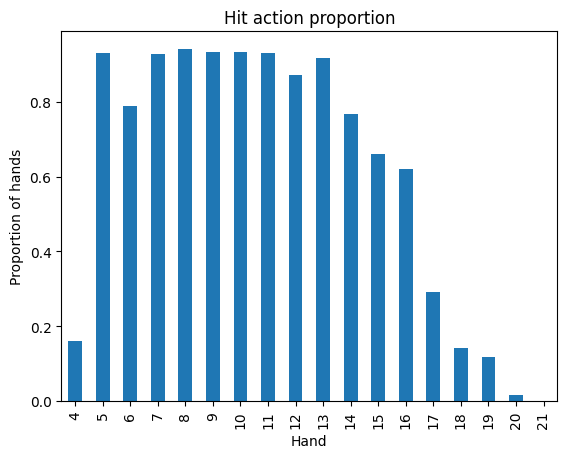

In [179]:
plot_proportion_hands(hit_df['Max Hand'].value_counts(), max_hands_df, "Hit action proportion")

### Stand

In [180]:
stand_df = raw_df[raw_df['Action'] == "STAND"]

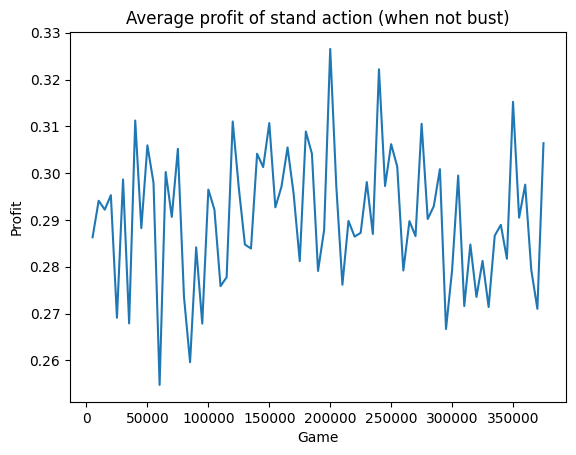

In [181]:
plot_rolling_rewards(stand_df, 5000, "Average profit of stand action (when not bust)")

In [182]:
stand_df["Episode Net Reward"].mean()

0.2908286817697397

In [183]:
stand_df['Dealer'].mean()

6.233977918182398

In [184]:
stand_df['Hand'].mean()

17.297290190822643

In [185]:
stand_df['Max Hand'].mean()

18.487640564171294

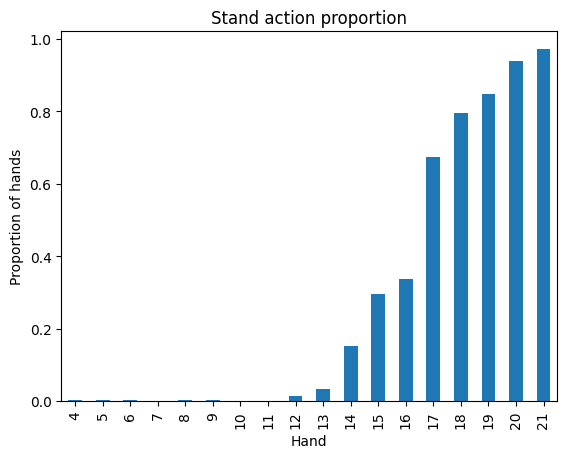

In [186]:
plot_proportion_hands(stand_df['Max Hand'].value_counts(), max_hands_df, "Stand action proportion")

### Double Down

In [187]:
double_df = raw_df[raw_df['Action'] == "DOUBLE_DOWN"]

In [188]:
double_df.shape

(573, 14)

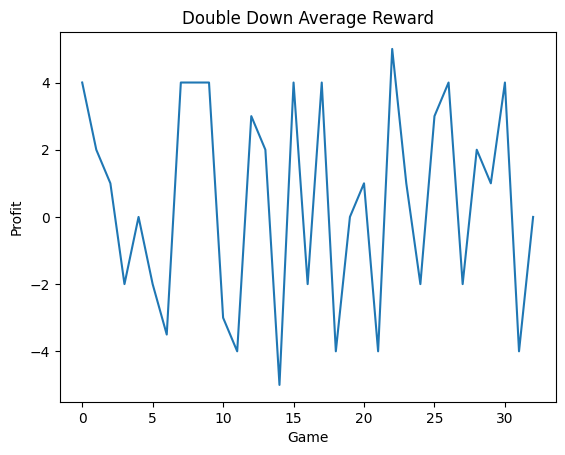

In [189]:
plot_rolling_rewards(double_df, 1, "Double Down Average Reward")

In [190]:
double_df['Episode Net Reward'].mean()

0.4696969696969697

In [191]:
double_df['Hand'].mean()

10.280977312390926

In [192]:
double_df['Hand'].value_counts()

11    278
10    178
9     117
Name: Hand, dtype: int64

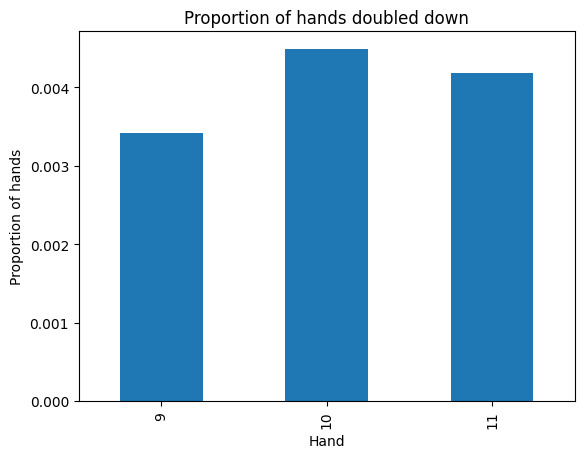

In [193]:
plot_proportion_hands(double_df['Hand'].value_counts(), hands_df, "Proportion of hands doubled down")

In [194]:
double_df['Max Hand'].mean()

11.328097731239092

In [195]:
double_df['Dealer'].mean()

4.821989528795812

### Split

In [196]:
split_df = raw_df[raw_df['Action'] == "SPLIT"]

In [197]:
split_df.shape

(14555, 14)

In [198]:
split_df['Hand'].mean()

10.863071109584336

<Axes: >

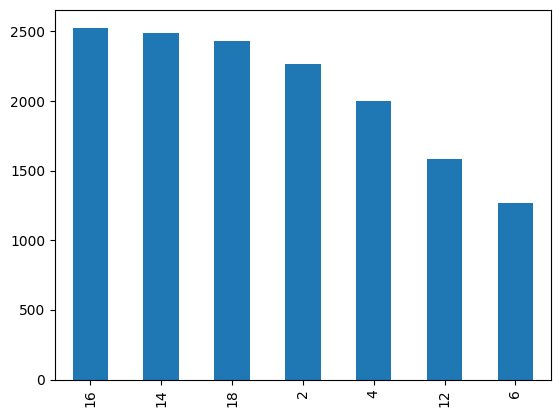

In [199]:
split_df['Hand'].value_counts().plot(kind='bar')

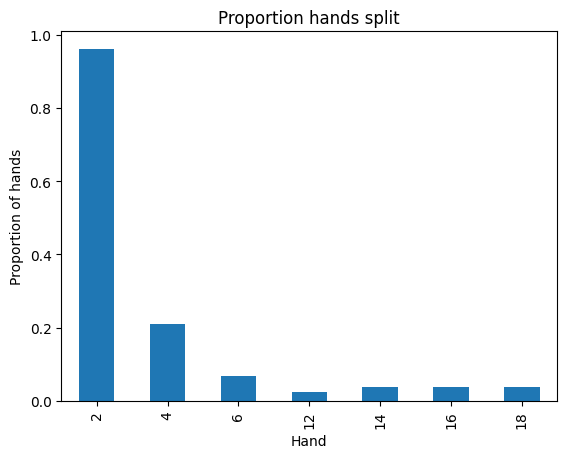

In [200]:
plot_proportion_hands(split_df['Hand'].value_counts(), hands_df, "Proportion hands split")

### Insurance

In [201]:
insurance_df = raw_df[(raw_df['Action'] == "INSURANCE_HALF") | (raw_df['Action'] == "INSURANCE_FULL")]

In [202]:
insurance_df['Dealer'].count() / raw_df[raw_df['Dealer'] == 1].shape[0]

0.36025435658463184

In [203]:
insurance_df['Max Hand'].mean()

14.548426215371348

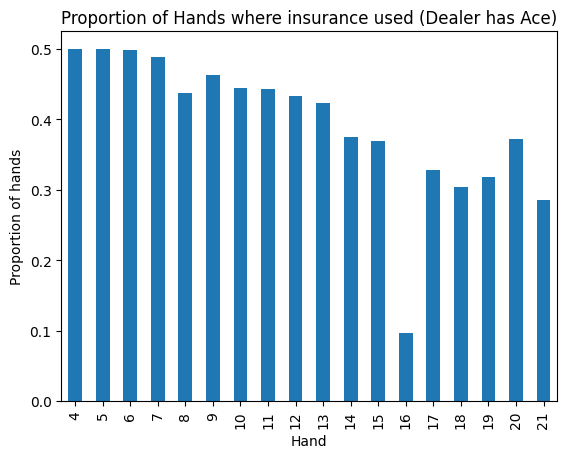

In [204]:
plot_proportion_hands(insurance_df['Max Hand'].value_counts(), raw_df[raw_df['Dealer'] == 1]['Max Hand'].value_counts(), "Proportion of Hands where insurance used (Dealer has Ace)")

## By hand value

### Hand of 10

In [205]:
hand_10_df = raw_df[raw_df["Max Hand"] == 10].tail(10000)

<Axes: >

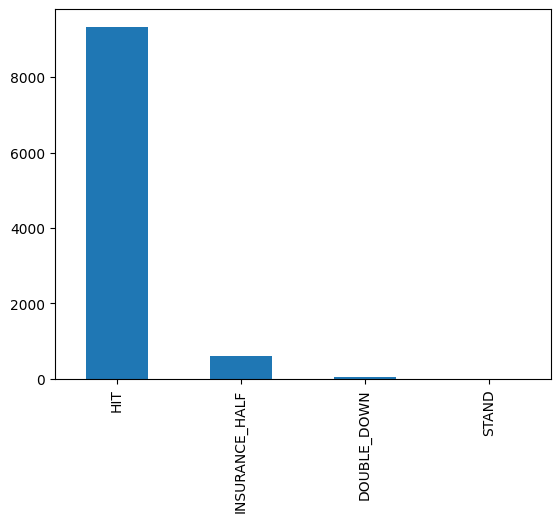

In [206]:
hand_10_df['Action'].value_counts().plot(kind='bar')

In [207]:
hand_10_df[hand_10_df['Action'] == "STAND"]
# Seems to be standing on 10 when it has a lot of hands (split twice or more)

,Episode,Dealer,Current Hand,Num Hands,Hand,Has Ace,Can Split,Has Hit,Bet Size,Insurance,Action,Reward,Episode Net Reward,Max Hand
585697,12099829680,5,0,3,10,0,0,0,1,0.00,STAND,0.0,NaN,10
634527,12099857111,6,1,2,10,0,0,0,1,0.00,STAND,3.0,3.0,10
698368,12099893212,10,0,2,10,0,0,1,1,0.00,STAND,0.0,NaN,10
718924,12099904831,9,1,3,10,0,0,1,1,0.00,STAND,0.0,NaN,10
734266,12099913438,2,1,3,10,0,1,1,1,0.00,STAND,0.0,NaN,10
738290,12099915689,6,1,3,10,0,0,0,1,0.00,STAND,0.0,NaN,10
769663,12099933350,5,0,3,10,0,0,0,1,0.00,STAND,0.0,NaN,10
811779,12099956984,1,1,3,10,0,0,0,1,0.25,STAND,0.0,NaN,10


### Hand of 20

In [208]:
hand_20_df = raw_df[raw_df["Max Hand"] == 20].tail(5000)

<Axes: >

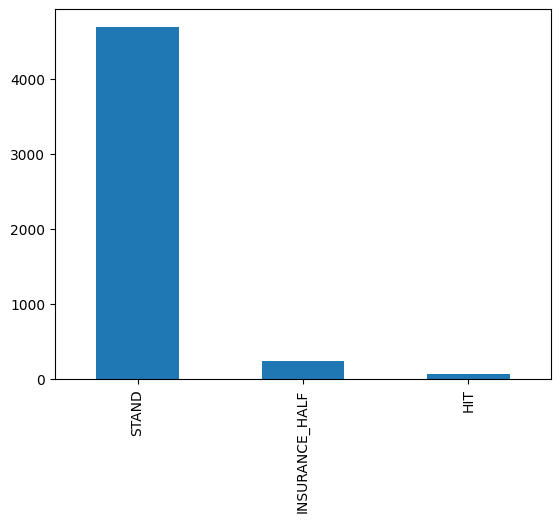

In [209]:
hand_20_df['Action'].value_counts().plot(kind='bar')

In [210]:
hand_20_df[hand_20_df['Action'] == "STAND"]['Episode Net Reward'].mean()

0.581175836030205

In [211]:
hand_20_df[hand_20_df['Action'] == "HIT"]

,Episode,Dealer,Current Hand,Num Hands,Hand,Has Ace,Can Split,Has Hit,Bet Size,Insurance,Action,Reward,Episode Net Reward,Max Hand
840865,12099973405,4,0,1,10,1,0,0,1,0.00,HIT,0.0,NaN,20
843330,12099974790,4,0,1,10,1,0,0,1,0.00,HIT,0.0,NaN,20
843372,12099974816,4,0,1,10,1,0,0,1,0.00,HIT,0.0,NaN,20
844479,12099975432,1,0,1,10,1,0,0,1,0.25,HIT,0.0,NaN,20
846443,12099976556,4,0,1,10,1,0,0,1,0.00,HIT,0.0,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886331,12099998936,4,0,1,10,1,0,0,1,0.00,HIT,0.0,NaN,20
886501,12099999030,1,0,1,10,1,0,0,1,0.25,HIT,0.0,NaN,20
886761,12099999178,1,0,2,10,1,0,0,1,0.25,HIT,0.0,NaN,20
887601,12099999640,1,0,1,10,1,0,0,1,0.25,HIT,0.0,NaN,20


## Basic Strategy Comparison

In [212]:
# Hard hand evaluation
eval_df = raw_df[raw_df['Has Ace'] == 0].tail(10000)
hard_action = {}

for hero_hand in range(8, 22):
  for dealer in range(1, 11):
    hard_action[(hero_hand, dealer)] = eval_df[(eval_df["Hand"] == hero_hand) & (eval_df["Dealer"] == dealer)]['Action'].mode().iloc[0]

In [213]:
hard_action

{(8, 1): 'HIT',
 (8, 2): 'HIT',
 (8, 3): 'HIT',
 (8, 4): 'HIT',
 (8, 5): 'HIT',
 (8, 6): 'HIT',
 (8, 7): 'HIT',
 (8, 8): 'HIT',
 (8, 9): 'HIT',
 (8, 10): 'HIT',
 (9, 1): 'HIT',
 (9, 2): 'HIT',
 (9, 3): 'HIT',
 (9, 4): 'HIT',
 (9, 5): 'HIT',
 (9, 6): 'HIT',
 (9, 7): 'HIT',
 (9, 8): 'HIT',
 (9, 9): 'HIT',
 (9, 10): 'HIT',
 (10, 1): 'HIT',
 (10, 2): 'HIT',
 (10, 3): 'HIT',
 (10, 4): 'HIT',
 (10, 5): 'HIT',
 (10, 6): 'HIT',
 (10, 7): 'HIT',
 (10, 8): 'HIT',
 (10, 9): 'HIT',
 (10, 10): 'HIT',
 (11, 1): 'HIT',
 (11, 2): 'HIT',
 (11, 3): 'HIT',
 (11, 4): 'HIT',
 (11, 5): 'HIT',
 (11, 6): 'HIT',
 (11, 7): 'HIT',
 (11, 8): 'HIT',
 (11, 9): 'HIT',
 (11, 10): 'HIT',
 (12, 1): 'HIT',
 (12, 2): 'HIT',
 (12, 3): 'HIT',
 (12, 4): 'HIT',
 (12, 5): 'HIT',
 (12, 6): 'HIT',
 (12, 7): 'HIT',
 (12, 8): 'HIT',
 (12, 9): 'HIT',
 (12, 10): 'HIT',
 (13, 1): 'HIT',
 (13, 2): 'HIT',
 (13, 3): 'HIT',
 (13, 4): 'HIT',
 (13, 5): 'HIT',
 (13, 6): 'HIT',
 (13, 7): 'HIT',
 (13, 8): 'HIT',
 (13, 9): 'HIT',
 (13, 10): '

In [214]:
# Soft hand evaluation
eval_df = raw_df[raw_df['Has Ace'] == 1].tail(10000)
soft_action = {}

for hero_hand in range(2, 12):
  for dealer in range(1, 11):
    soft_action[(hero_hand, dealer)] = eval_df[(eval_df["Hand"] == hero_hand) & (eval_df["Dealer"] == dealer)]['Action'].mode().iloc[0]

In [215]:
soft_action

{(2, 1): 'SPLIT',
 (2, 2): 'SPLIT',
 (2, 3): 'SPLIT',
 (2, 4): 'SPLIT',
 (2, 5): 'SPLIT',
 (2, 6): 'SPLIT',
 (2, 7): 'SPLIT',
 (2, 8): 'SPLIT',
 (2, 9): 'SPLIT',
 (2, 10): 'SPLIT',
 (3, 1): 'HIT',
 (3, 2): 'HIT',
 (3, 3): 'HIT',
 (3, 4): 'HIT',
 (3, 5): 'HIT',
 (3, 6): 'HIT',
 (3, 7): 'HIT',
 (3, 8): 'HIT',
 (3, 9): 'HIT',
 (3, 10): 'HIT',
 (4, 1): 'HIT',
 (4, 2): 'HIT',
 (4, 3): 'HIT',
 (4, 4): 'HIT',
 (4, 5): 'HIT',
 (4, 6): 'HIT',
 (4, 7): 'HIT',
 (4, 8): 'HIT',
 (4, 9): 'HIT',
 (4, 10): 'HIT',
 (5, 1): 'HIT',
 (5, 2): 'HIT',
 (5, 3): 'HIT',
 (5, 4): 'HIT',
 (5, 5): 'HIT',
 (5, 6): 'HIT',
 (5, 7): 'HIT',
 (5, 8): 'HIT',
 (5, 9): 'HIT',
 (5, 10): 'HIT',
 (6, 1): 'HIT',
 (6, 2): 'HIT',
 (6, 3): 'HIT',
 (6, 4): 'HIT',
 (6, 5): 'HIT',
 (6, 6): 'HIT',
 (6, 7): 'HIT',
 (6, 8): 'HIT',
 (6, 9): 'HIT',
 (6, 10): 'HIT',
 (7, 1): 'HIT',
 (7, 2): 'HIT',
 (7, 3): 'HIT',
 (7, 4): 'HIT',
 (7, 5): 'HIT',
 (7, 6): 'HIT',
 (7, 7): 'HIT',
 (7, 8): 'HIT',
 (7, 9): 'HIT',
 (7, 10): 'HIT',
 (8, 1): 'HIT'